In [ ]:
pip install xgboost

In [119]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [21]:
import pandas as pd
import numpy as np

In [23]:
data = pd.read_csv(r"C:\Users\user\Desktop\telecom churn.csv")
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [25]:
data.info

<bound method DataFrame.info of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL 

In [27]:
data.describe

<bound method NDFrame.describe of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DS

In [29]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [31]:
binary_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for feature in binary_features:
    data[feature] = data[feature].map({'Yes': 1, 'No': 0}) if feature != 'gender' else data[feature].map({'Female': 1, 'Male': 0})


In [33]:
data = pd.get_dummies(data, columns=['InternetService', 'Contract', 'PaymentMethod'], drop_first=True)
data.drop(['customerID'], axis=1, inplace=True)


In [35]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')


In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [38]:
X = data.drop('Churn', axis=1)
y = data['Churn'].map({'Yes': 1, 'No': 0})

In [39]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [40]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,-1.277445,0,No phone service,No,Yes,No,...,-1.160323,-0.994194,No,False,False,False,False,False,True,False
1,0,0,0,0,0.066327,1,No,Yes,No,Yes,...,-0.259629,-0.173740,No,False,False,True,False,False,False,True
2,0,0,0,0,-1.236724,1,No,Yes,Yes,No,...,-0.362660,-0.959649,Yes,False,False,False,False,False,False,True
3,0,0,0,0,0.514251,0,No phone service,Yes,No,Yes,...,-0.746535,-0.195248,No,False,False,True,False,False,False,False
4,1,0,0,0,-1.236724,1,No,No,No,No,...,0.197365,-0.940457,Yes,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,-0.340876,1,Yes,Yes,No,Yes,...,0.665992,-0.129180,No,False,False,True,False,False,False,True
7039,1,0,1,1,1.613701,1,Yes,No,Yes,Yes,...,1.277533,2.241056,No,True,False,True,False,True,False,False
7040,1,0,1,1,-0.870241,0,No phone service,Yes,No,No,...,-1.168632,-0.854514,No,False,False,False,False,False,True,False
7041,0,1,1,0,-1.155283,1,Yes,No,No,No,...,0.320338,-0.872095,Yes,True,False,False,False,False,False,True


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [42]:
categorical_cols = X_train.select_dtypes(include=['object']).columns
binary_cols = [col for col in categorical_cols if data[col].nunique() == 2]  
multi_class_cols = [col for col in categorical_cols if data[col].nunique() > 2] 

for col in binary_cols:
    data[col] = data[col].replace({'Yes': 1, 'No': 0, 'Female': 1, 'Male': 0})

data = pd.get_dummies(data, columns=multi_class_cols, drop_first=True)

print(data.head())


   gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0       1              0        1           0 -1.277445             0   
1       0              0        0           0  0.066327             1   
2       0              0        0           0 -1.236724             1   
3       0              0        0           0  0.514251             0   
4       1              0        0           0 -1.236724             1   

   PaperlessBilling  MonthlyCharges  TotalCharges Churn  ...  \
0                 1       -1.160323     -0.994194    No  ...   
1                 0       -0.259629     -0.173740    No  ...   
2                 1       -0.362660     -0.959649   Yes  ...   
3                 0       -0.746535     -0.195248    No  ...   
4                 1        0.197365     -0.940457   Yes  ...   

   OnlineBackup_No internet service  OnlineBackup_Yes  \
0                             False              True   
1                             False             False   
2    

In [43]:
data.dtypes

gender                                     int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                   float64
PhoneService                               int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                     object
InternetService_Fiber optic                 bool
InternetService_No                          bool
Contract_One year                           bool
Contract_Two year                           bool
PaymentMethod_Credit card (automatic)       bool
PaymentMethod_Electronic check              bool
PaymentMethod_Mailed check                  bool
MultipleLines_No phone service              bool
MultipleLines_Yes                           bool
OnlineSecurity_No internet service          bool
OnlineSecurity_Yes  

In [44]:
X_train_encoded = pd.get_dummies(X_train, drop_first=True)

In [45]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()


for col in categorical_cols:
    X_train[col] = X_train[col].astype('category')
    X_test[col] = X_test[col].astype('category')



In [46]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, enable_categorical=True)
xgb_model.fit(X_train, y_train)


C:\Users\user\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:44:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [47]:
y_pred = xgb_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7821149751596878
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1036
           1       0.61      0.49      0.54       373

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409



In [48]:
import matplotlib.pyplot as plt


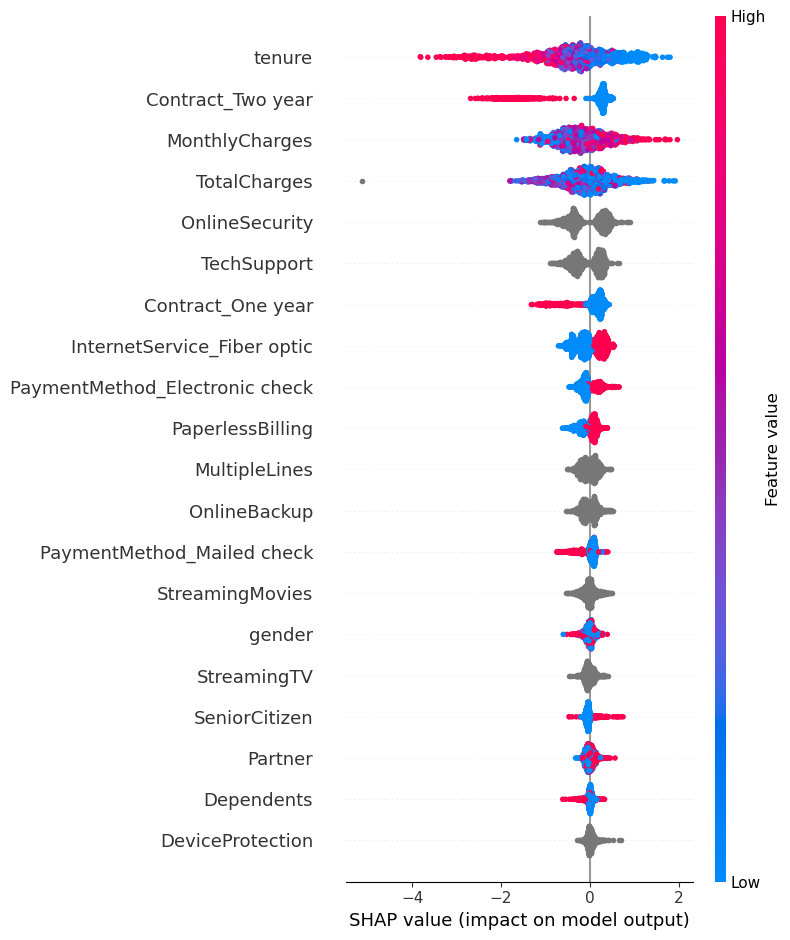

In [49]:
import shap
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)


Top 5 Reasons for Churn:
tenure               0.742506
Contract_Two year    0.644489
MonthlyCharges       0.455555
TotalCharges         0.436742
OnlineSecurity       0.375675
dtype: float32


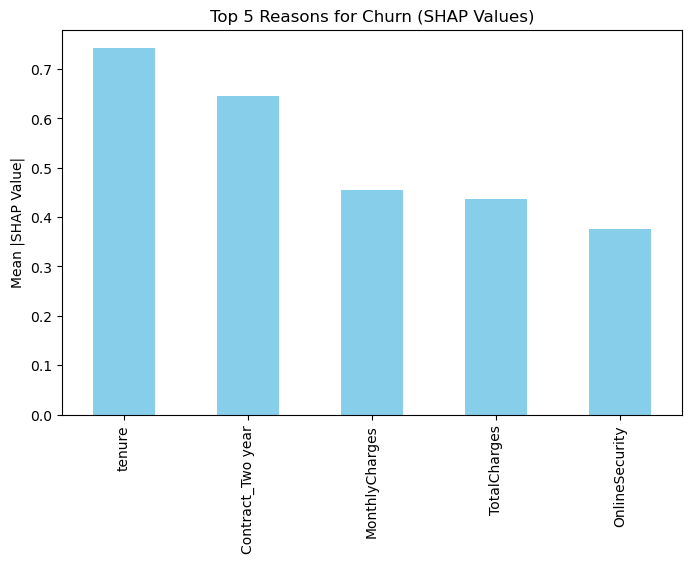

In [52]:
shap_df = pd.DataFrame(shap_values, columns=X_test.columns)
top_5_features = shap_df.abs().mean().sort_values(ascending=False).head(5)

print("Top 5 Reasons for Churn:")
print(top_5_features)

top_5_features.plot(kind='bar', figsize=(8, 5), title='Top 5 Reasons for Churn (SHAP Values)', color='skyblue')
plt.ylabel('Mean |SHAP Value|')
plt.show()


In [132]:
print("Enter the following details for the new customer:")

gender = int(input("Gender (1 for Female, 0 for Male): "))
senior_citizen = int(input("Senior Citizen (1 for Yes, 0 for No): "))
partner = int(input("Partner (1 for Yes, 0 for No): "))
dependents = int(input("Dependents (1 for Yes, 0 for No): "))
tenure = float(input("Tenure (in months, e.g., 12): "))
phone_service = int(input("Phone Service (1 for Yes, 0 for No): "))
paperless_billing = int(input("Paperless Billing (1 for Yes, 0 for No): "))
monthly_charges = float(input("Monthly Charges (e.g., 70): "))
total_charges = float(input("Total Charges (e.g., 840): "))

multiple_lines = input("Multiple Lines (No, Yes, No phone service): ")
internet_service = input("Internet Service (DSL, Fiber optic, No): ")
online_security = input("Online Security (No, Yes, No internet service): ")
online_backup = input("Online Backup (No, Yes, No internet service): ")
device_protection = input("Device Protection (No, Yes, No internet service): ")
tech_support = input("Tech Support (No, Yes, No internet service): ")
streaming_tv = input("Streaming TV (No, Yes, No internet service): ")
streaming_movies = input("Streaming Movies (No, Yes, No internet service): ")

contract = input("Contract (Month-to-month, One year, Two year): ")
payment_method = input("Payment Method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)): ")

Enter the following details for the new customer:


Gender (1 for Female, 0 for Male):  0
Senior Citizen (1 for Yes, 0 for No):  0
Partner (1 for Yes, 0 for No):  0
Dependents (1 for Yes, 0 for No):  0
Tenure (in months, e.g., 12):  2
Phone Service (1 for Yes, 0 for No):  1
Paperless Billing (1 for Yes, 0 for No):  0
Monthly Charges (e.g., 70):  1
Total Charges (e.g., 840):  1
Multiple Lines (No, Yes, No phone service):  0
Internet Service (DSL, Fiber optic, No):  0
Online Security (No, Yes, No internet service):  0
Online Backup (No, Yes, No internet service):  0
Device Protection (No, Yes, No internet service):  0
Tech Support (No, Yes, No internet service):  0
Streaming TV (No, Yes, No internet service):  0
Streaming Movies (No, Yes, No internet service):  0
Contract (Month-to-month, One year, Two year):  0
Payment Method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)):  1


In [134]:
new_customer ={
    'gender': gender,
    'SeniorCitizen': senior_citizen,
    'Partner': partner,
    'Dependents': dependents,
    'tenure': tenure,
    'PhoneService': phone_service,
    'PaperlessBilling': paperless_billing,
    'MonthlyCharges': monthly_charges,
    'TotalCharges': total_charges,
    'MultipleLines': multiple_lines,
    'InternetService': internet_service,
    'OnlineSecurity': online_security,
    'OnlineBackup': online_backup,
    'DeviceProtection': device_protection,
    'TechSupport': tech_support,
    'StreamingTV': streaming_tv,
    'StreamingMovies': streaming_movies,
    'Contract': contract,
    'PaymentMethod': payment_method,
}


In [136]:
new_customer_df = pd.DataFrame([new_customer])


In [138]:
expected_features = xgb_model.get_booster().feature_names
for feature in expected_features:
    if feature not in customer_df.columns:
        customer_df[feature] = 0

In [140]:
customer_df = customer_df[expected_features]


In [142]:
prediction = xgb_model.predict(customer_df)
prediction_proba = xgb_model.predict_proba(customer_df)

if prediction[0] == 1:
    print("\nPrediction: Customer will churn.")
    print("Churn Probability:", prediction_proba[0][1])
else:
    print("\nPrediction: Customer will NOT churn.")
    print("Churn Probability:", prediction_proba[0][1])


Prediction: Customer will NOT churn.
Churn Probability: 0.2877752


In [144]:
shap.initjs()
shap.force_plot(explainer.expected_value, explainer.shap_values(customer_df)[0],customer_df)

In [146]:
explainer = shap.TreeExplainer(xgb_model, feature_perturbation="tree_path_dependent")
shap_values = explainer.shap_values(customer_df)


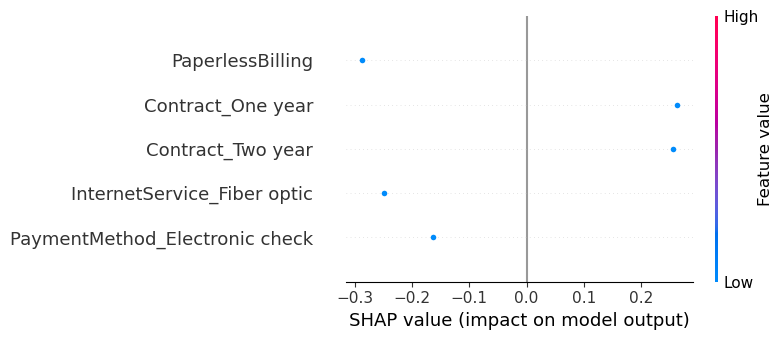

In [148]:
shap.summary_plot(shap_values, customer_df, max_display=5)


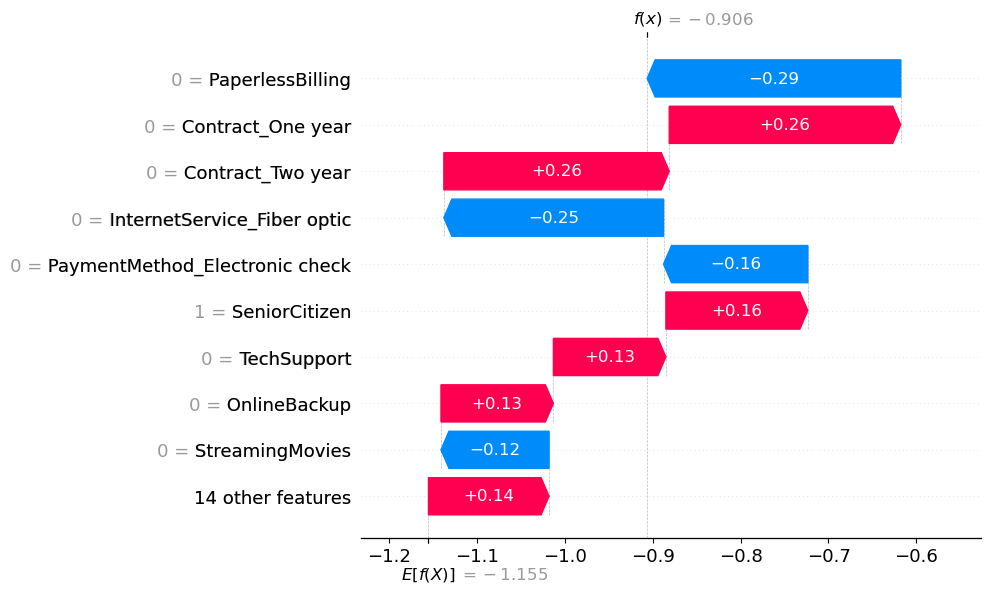

In [150]:
shap.plots.waterfall(shap.Explanation(values=shap_values[0], base_values=explainer.expected_value, data=customer_df.iloc[0]))


In [152]:
shap_df = pd.DataFrame({
    'Feature': customer_df.columns,
    'SHAP Value': shap_values[0],
})
shap_df = shap_df.sort_values(by='SHAP Value', key=abs, ascending=False).head(5)

In [154]:
print("Top 5 reasons for churn:")
print(shap_df)
plt.savefig("shap_summary_plot.png")

Top 5 reasons for churn:
                           Feature  SHAP Value
13                PaperlessBilling   -0.288359
18               Contract_One year    0.263246
19               Contract_Two year    0.256308
16     InternetService_Fiber optic   -0.249822
21  PaymentMethod_Electronic check   -0.164100


<Figure size 640x480 with 0 Axes>